<a href="https://colab.research.google.com/github/Isi2000/NX/blob/main/NBA_GRAPHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from collections import defaultdict

In [2]:
!git clone https://github.com/Isi2000/NX.git

Cloning into 'NX'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 5), reused 10 (delta 0), pack-reused 0
Receiving objects: 100% (28/28), 7.36 MiB | 12.99 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
df_MVP = pd.read_csv('/content/NX/MVP_2022_2023.txt', sep = '\t', skiprows=[0])

In [4]:
B = nx.Graph()

In [5]:
B.add_nodes_from(df_MVP['Voter'], bipartite = 0)
for col_name in df_MVP.columns[2:]:
  B.add_nodes_from(df_MVP[col_name], bipartite = 1)
print(B)

Graph with 113 nodes and 0 edges


In [6]:
dumb_map = {1: 10, 2: 7, 3: 5, 4: 3, 5: 1} #becaus it is easier to extract weight from position
for idx, row in df_MVP.iterrows():
  voter_node = row['Voter']
  for col_name in df_MVP.columns[2:]:
    nominee_node = row[col_name]
    B.add_edge(voter_node, nominee_node, weight = dumb_map[int(col_name[0])])

In [7]:
#gradient of blues
color_map = {10: '#336699', 7: '#5a92bd', 5: '#8bb0d0', 3: '#b3cde3', 1: '#dcecf9'}
color_edges = [color_map[B[u][v]['weight']] for u,v in B.edges()]
edge_weights = [(B[u][v]['weight']/10) for u,v in B.edges()]

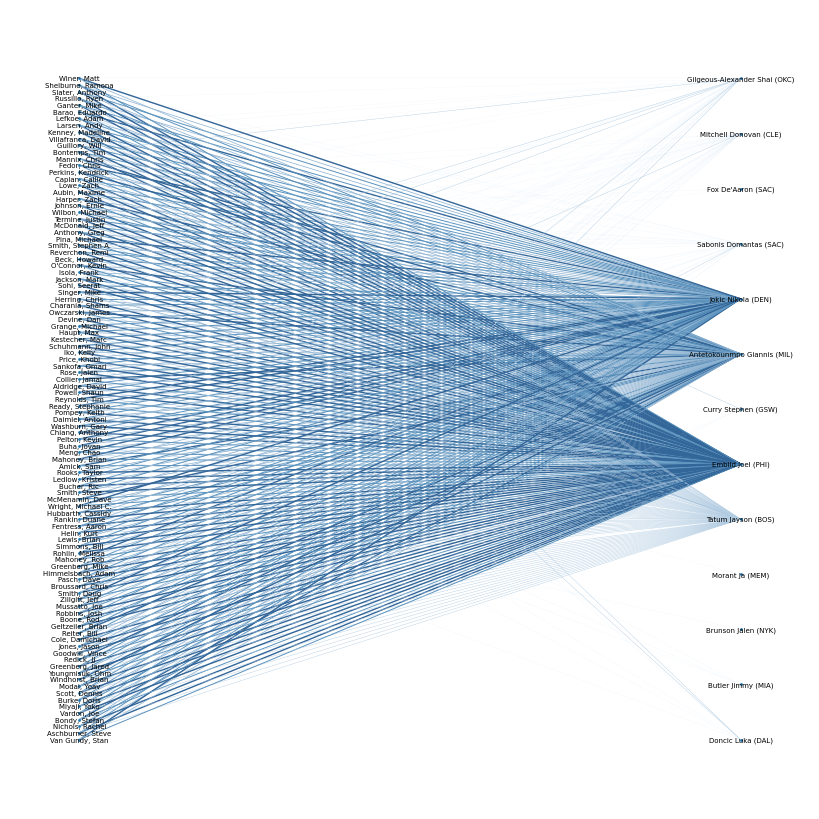

In [8]:
pos = nx.bipartite_layout(B, df_MVP['Voter'])
plt.figure(figsize=(8, 8)) #change the fisize when ready to plot well
nx.draw(B, pos,  with_labels=True, font_size=5, node_size=1, edge_color = color_edges, width = edge_weights)
plt.show()

In [9]:
nx.is_bipartite(B)

True

# Network analysis

Before taking any deep consideration on the network we must first analyze the data according to the standard metrics to ge to get a better feeling

In [10]:
# 1. Top players based on total weight
player_weights = defaultdict(int)
for u, v, data in B.edges(data=True):
    if B.nodes[u]['bipartite'] == 1:  # u is a player
        player_weights[u] += data['weight']
    else:
        player_weights[v] += data['weight']

sorted_players = sorted(player_weights.items(), key=lambda x: x[1], reverse=True)
print("Top players based on points:")
for player, weight in sorted_players[:10]:
    print(f"{player}: {weight} points")

Top players based on points:
Embiid Joel (PHI): 915 points
Jokic Nikola (DEN): 674 points
Antetokounmpo Giannis (MIL): 606 points
Tatum Jayson (BOS): 280 points
Gilgeous-Alexander Shai (OKC): 46 points
Mitchell Donovan (CLE): 30 points
Sabonis Domantas (SAC): 27 points
Doncic Luka (DAL): 10 points
Curry Stephen (GSW): 5 points
Butler Jimmy (MIA): 3 points


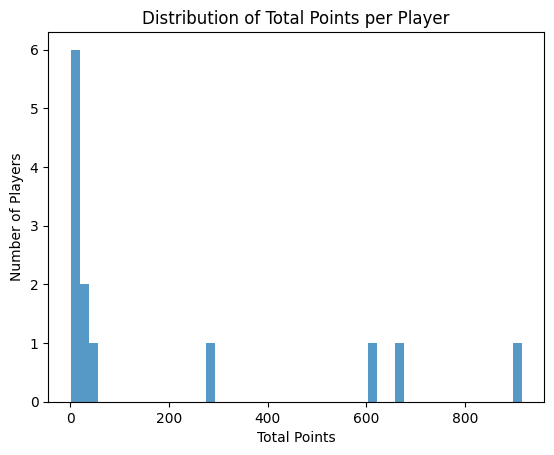

In [11]:
plt.hist(player_weights.values(), bins=50, alpha=0.75)
plt.title("Distribution of Total Points per Player")
plt.xlabel("Total Points")
plt.ylabel("Number of Players")
plt.show()

In [12]:
positions = defaultdict(lambda: defaultdict(int))

for idx, row in df_MVP.iterrows():
    for col_idx, col_name in enumerate(df_MVP.columns[2:], 1):
        nominee_node = row[col_name]
        positions[nominee_node][col_idx] += 1

for player, pos_dict in positions.items():
    print(f"{player}: {pos_dict}")


Embiid Joel (PHI): defaultdict(<class 'int'>, {1: 73, 2: 25, 3: 2})
Jokic Nikola (DEN): defaultdict(<class 'int'>, {2: 52, 3: 32, 1: 15})
Antetokounmpo Giannis (MIL): defaultdict(<class 'int'>, {3: 65, 1: 12, 2: 23})
Tatum Jayson (BOS): defaultdict(<class 'int'>, {4: 89, 5: 8, 3: 1})
Mitchell Donovan (CLE): defaultdict(<class 'int'>, {5: 27, 4: 1})
Sabonis Domantas (SAC): defaultdict(<class 'int'>, {5: 24, 4: 1})
Gilgeous-Alexander Shai (OKC): defaultdict(<class 'int'>, {5: 28, 4: 6})
Curry Stephen (GSW): defaultdict(<class 'int'>, {4: 1, 5: 2})
Brunson Jalen (NYK): defaultdict(<class 'int'>, {5: 1})
Butler Jimmy (MIA): defaultdict(<class 'int'>, {5: 3})
Doncic Luka (DAL): defaultdict(<class 'int'>, {5: 4, 4: 2})
Fox De'Aaron (SAC): defaultdict(<class 'int'>, {5: 2})
Morant Ja (MEM): defaultdict(<class 'int'>, {5: 1})


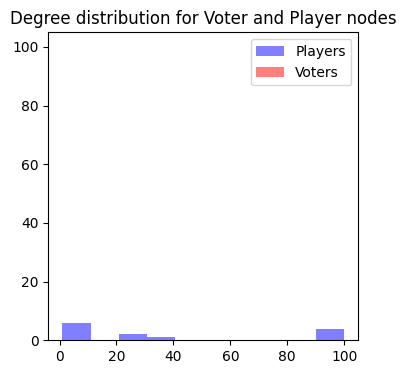

In [13]:
voters_degree = [d for n, d in B.degree() if B.nodes[n]['bipartite'] == 0]
players_degree = [d for n, d in B.degree() if B.nodes[n]['bipartite'] == 1]


plt.figure(figsize = (4, 4))
plt.hist(players_degree, alpha=0.5, label="Players", color = 'Blue')
plt.hist(voters_degree, alpha=0.5, label="Voters", color= 'Red')
plt.title("Degree distribution for Voter and Player nodes")
plt.legend()
plt.show()

# VOTER MODEL

The hope is that of trying to explaine the results of the MVP vote with a complex voter model

In [18]:
import chardet

with open('/content/NX/JT_DATA.txt', 'rb') as rawdata:
    result = chardet.detect(rawdata.read())
    print(result['encoding'])

ISO-8859-1


In [63]:
df_EMBID = pd.read_csv('/content/NX/EMBID_DATA.txt', sep = '\t', encoding = result['encoding'])
df_JOKER = pd.read_csv('/content/NX/JOKER_DATA.txt', sep = '\t', encoding = result['encoding'])
df_GIANNIS = pd.read_csv('/content/NX/GIANNIS_DATA.txt', sep = '\t', encoding = result['encoding'])
df_JT = pd.read_csv('/content/NX/JT_DATA.txt', sep = '\t', encoding = result['encoding'])

In [113]:
from datetime import datetime

#I need uniform dates

convert_date = lambda x: datetime.strptime(x, '%d-%b-%y').strftime('%d-%m-%Y')

win_loss_map = {'L': 0, 'W': 1}

take_first = lambda x: win_loss_map[x[0]]

EMBID = df_EMBID[['DATE', 'SCORE', 'PTS', 'EFF']].dropna().reset_index()
JOKER = df_JOKER[['DATE', 'SCORE', 'PTS', 'EFF']].dropna().reset_index()
GIANNIS = df_GIANNIS[['DATE', 'SCORE', 'PTS', 'EFF']].dropna().reset_index()
JT = df_JT[['DATE', 'SCORE', 'PTS', 'EFF']].dropna().reset_index()

EMBID['DATE'] = EMBID['DATE'].apply(convert_date)
JOKER['DATE'] = JOKER['DATE'].apply(convert_date)
GIANNIS['DATE'] = GIANNIS['DATE'].apply(convert_date)
JT['DATE'] = JT['DATE'].apply(convert_date)

EMBID['SCORE'] = EMBID['SCORE'].apply(take_first)
JOKER['SCORE'] = JOKER['SCORE'].apply(take_first)
GIANNIS['SCORE'] = GIANNIS['SCORE'].apply(take_first)
JT['SCORE'] = JT['SCORE'].apply(take_first)

print(EMBID.head)
print(JOKER.head)
print(GIANNIS.head)
print(JT.head)

<bound method NDFrame.head of     index        DATE  SCORE   PTS   EFF
0       0  19-10-2022      0  26.0  30.0
1       2  21-10-2022      0  15.0  11.0
2       4  23-10-2022      0  40.0  43.0
3       6  25-10-2022      1  26.0  29.0
4       8  27-10-2022      0  31.0  30.0
..    ...         ...    ...   ...   ...
61    122  30-03-2023      1  25.0  25.0
62    124  01-04-2023      1  25.0  27.0
63    126  03-04-2023      0  28.0  27.0
64    128  05-04-2023      1  52.0  64.0
65    130  07-04-2023      0  21.0  23.0

[66 rows x 5 columns]>
<bound method NDFrame.head of     index        DATE  SCORE   PTS   EFF
0       0  20-10-2022      0  27.0  32.0
1       2  22-10-2022      1  26.0  37.0
2       4  23-10-2022      1  19.0  40.0
3       6  25-10-2022      0   9.0  25.0
4       8  27-10-2022      1  31.0  49.0
..    ...         ...    ...   ...   ...
64    128  23-03-2023      1  31.0  47.0
65    130  26-03-2023      1  31.0  35.0
66    132  28-03-2023      1  25.0  48.0
67    134  05-

In order to have fair stats we need to average over months: so there will be only 7 time steps, that or we update for each date

In [105]:
#all game days
EMBID_LIST = list(EMBID['DATE'])
JOKER_LIST = list(JOKER['DATE'])
GIANNIS_LIST = list(GIANNIS['DATE'])
JT_LIST = list(JT['DATE'])
dates =set(EMBID_LIST + JOKER_LIST +  GIANNIS_LIST + JT_LIST)
def custom_sort(date_str):
    return datetime.strptime(date_str, '%d-%m-%Y')
sorted_dates = sorted(dates, key=custom_sort)
print(sorted_dates)

['19-10-2022', '20-10-2022', '21-10-2022', '22-10-2022', '23-10-2022', '25-10-2022', '27-10-2022', '29-10-2022', '30-10-2022', '31-10-2022', '01-11-2022', '03-11-2022', '04-11-2022', '05-11-2022', '06-11-2022', '08-11-2022', '10-11-2022', '11-11-2022', '12-11-2022', '13-11-2022', '14-11-2022', '15-11-2022', '17-11-2022', '19-11-2022', '20-11-2022', '22-11-2022', '23-11-2022', '24-11-2022', '26-11-2022', '28-11-2022', '29-11-2022', '01-12-2022', '03-12-2022', '04-12-2022', '05-12-2022', '06-12-2022', '07-12-2022', '08-12-2022', '09-12-2022', '10-12-2022', '11-12-2022', '12-12-2022', '13-12-2022', '14-12-2022', '15-12-2022', '16-12-2022', '17-12-2022', '19-12-2022', '20-12-2022', '21-12-2022', '22-12-2022', '24-12-2022', '25-12-2022', '26-12-2022', '28-12-2022', '29-12-2022', '30-12-2022', '31-12-2022', '01-01-2023', '02-01-2023', '03-01-2023', '04-01-2023', '05-01-2023', '06-01-2023', '07-01-2023', '08-01-2023', '10-01-2023', '11-01-2023', '12-01-2023', '13-01-2023', '15-01-2023', '16-0

In [174]:
import random

embid_stats = []
giannis_stats = []
joker_stats = []
jt_stats = []

def weighted_average(arr):
    if len(arr) < 2:
        return average(arr)  # Call the generic average function if there are fewer than two elements.

    last_weight = len(arr)/4
    weights = [1] * (len(arr) - 1) + [last_weight]
    weighted_avg = sum(value * weight for value, weight in zip(arr, weights)) / sum(weights)

    return weighted_avg


def average(arr):
    if len(arr) == 0:
      return 0
    average = sum(arr) / len(arr)
    return average


def random_element_with_weighted_probability(values, num_selections=1):
    #since it is a custom function i will do something really bad
    name_map = {0: 'EMBID', 1: 'JOKER', 2: 'GIANNIS', 3: 'JT'}
    if num_selections <= 0:
        return []

    total_sum = sum(values)
    probabilities = [value / total_sum for value in values]

    random_selections = random.choices(values, probabilities, k=num_selections)
    if num_selections == 1:
        chosen_element = random_selections[0]
        original_position = name_map[values.index(chosen_element)]
        return chosen_element, original_position
    else:
        chosen_elements = []
        original_positions = []
        for selection in random_selections:
            original_position = values.index(selection)
            chosen_elements.append(selection)
            original_positions.append(original_position)
        return chosen_elements, original_positions

VALUES_PER_DAY = []
for i in sorted_dates:
  if i in EMBID_LIST:
    embid_stats.append(EMBID.loc[EMBID['DATE'] == i, ['EFF']].values[0])
    embid_value = weighted_average(embid_stats)
  else:
    embid_value = average(embid_stats)
  if i in JOKER_LIST:
    joker_stats.append(JOKER.loc[JOKER['DATE'] == i, ['EFF']].values[0])
    joker_value = weighted_average(joker_stats)
  else:
    joker_value = average(joker_stats)
  if i in GIANNIS_LIST:
    giannis_stats.append(GIANNIS.loc[GIANNIS['DATE'] == i, ['EFF']].values[0])
    giannis_value = weighted_average(giannis_stats)
  else:
    giannis_value = average(giannis_stats)
  if i in JT_LIST:
    jt_stats.append(JT.loc[JT['DATE'] == i, ['EFF']].values[0])
    jt_value = weighted_average(jt_stats)
  else:
    jt_value = average(jt_stats)
    DAY_VALUE = [embid_value, joker_value, giannis_value, jt_value]
    print(random_element_with_weighted_probability(DAY_VALUE))
    VALUES_PER_DAY.append(DAY_VALUE)



(array([30.]), 'EMBID')
(array([23.66666667]), 'EMBID')
(array([37.19047619]), 'JOKER')
(array([40.]), 'GIANNIS')
(array([36.53846154]), 'GIANNIS')
(array([27.66666667]), 'EMBID')
(array([27.66666667]), 'EMBID')
(array([34.44444444]), 'GIANNIS')
(array([32.30769231]), 'JOKER')
(array([33.58333333]), 'EMBID')
(array([33.58333333]), 'EMBID')
(array([33.33333333]), 'EMBID')
(array([33.5]), 'EMBID')
(array([33.5]), 'EMBID')
(array([30.35643564]), 'GIANNIS')
(array([29.38461538]), 'JT')
(array([39.62068966]), 'JOKER')
(array([35.79166667]), 'JOKER')
(array([39.93650794]), 'JOKER')
(array([36.53846154]), 'JOKER')
(array([35.19083969]), 'JOKER')
(array([34.70833333]), 'EMBID')
(array([33.31205674]), 'GIANNIS')
(array([36.74358974]), 'JOKER')
(array([33.53435115]), 'EMBID')
(array([37.41176471]), 'EMBID')
(array([29.66666667]), 'JT')
(array([26.0310559]), 'GIANNIS')
(array([31.70588235]), 'GIANNIS')
(array([40.53061224]), 'JOKER')
(array([31.51428571]), 'GIANNIS')
(array([33.59649123]), 'EMBID